In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# load csv
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.shape

(1252, 7)

In [4]:
#filter currurnecies that currently being traded
crypto_df= crypto_df[crypto_df['IsTrading']==True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
#drop column 'IsTrading' and Unnamed:0
crypto_df = crypto_df.drop(columns = ['IsTrading','Unnamed: 0'])


In [6]:
#check null values and drop null containing rows
crypto_df.isnull().sum()

crypto_df = crypto_df.dropna()

In [7]:
#check null values
crypto_df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [8]:
#filter cryptocurrencies that have been mined, crypto mined > 0
crypto_df = crypto_df[crypto_df['TotalCoinsMined']>0]
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0


In [9]:
coin = pd.DataFrame(crypto_df['CoinName']).reset_index(drop = True)
coin

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [10]:
#removed column CoinName
crypto_df = crypto_df.drop(columns = 'CoinName')


In [11]:
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [12]:
#convert data to numerical data

X = pd.get_dummies(crypto_df, columns = ['Algorithm','ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [19]:
#PCA model
pca=PCA(n_components=3)

crypto_pca = pca.fit_transform(scaled_data)

In [20]:
#put pca data into dataframe

pca_df = pd.DataFrame(data=crypto_pca)
pca_df.head()

,0,1,2
0,-0.329316,1.070350,-0.448979
1,-0.312660,1.070503,-0.449474
2,2.302353,1.645975,-0.626355
3,-0.151818,-1.369393,0.131918
4,-0.154544,-2.043164,0.293755


In [21]:
pca.explained_variance_ratio_

array([0.02793134, 0.0214111 , 0.0204826 ])

The data shows roughly a 0.02% variance for the three features. To increase the explained variance, we will need to increase the principal components

In [22]:
pca2=PCA(n_components=.90)

crypto_pca = pca2.fit_transform(scaled_data)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -4.46532550e-15,  5.62343533e-15,  1.49507977e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -3.63645692e-15,  5.25359408e-15,  2.25718281e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         7.75066626e-14, -1.17632711e-13, -5.02829165e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         4.92696433e-14,  2.74532450e-14,  1.56967958e-15],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.63533220e-15, -4.69781528e-16,  1.17522750e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         1.05646641e-15,  1.05006748e-15,  4.14908459e-15]])

In [24]:
pca2_df = pd.DataFrame(data=crypto_pca)
pca2_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-2.210782e-16,-6.883168e-16,2.282140e-15,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,7.921450e-17,-1.120989e-15,2.525930e-15,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,8.752073e-15,-2.234103e-14,-6.428405e-14,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-2.655003e-15,-1.002527e-14,-1.523596e-14,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-6.843734e-14,-1.448754e-13,-7.952353e-14,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,5.053451e-15,-2.187479e-11,-3.479650e-15,-0.851713,2.041159,3.560713,...,-2.195073e-16,-1.245385e-14,-1.888369e-14,1.081083e-14,-2.442418e-15,-1.163756e-14,1.668646e-14,2.036505e-14,-1.004832e-14,-3.803161e-15
528,-0.333144,1.032071,-0.590740,0.001399,8.834849e-15,3.721725e-12,-1.705276e-14,-0.007154,-1.320125,-0.052460,...,1.090840e-16,-7.745678e-16,1.846190e-15,-3.955569e-15,1.021953e-15,6.766213e-16,-1.874161e-15,-4.328686e-15,5.496276e-15,1.153312e-16
529,0.324349,-2.312308,0.421515,-0.001319,-5.674971e-15,-3.506871e-12,1.223719e-14,0.017309,0.161077,-0.047787,...,-1.977146e-14,-6.881003e-14,-5.028111e-14,1.778927e-14,4.078607e-14,1.826705e-14,4.864731e-14,4.926964e-14,2.745325e-14,1.569680e-15
530,-0.149364,-2.049336,0.412968,-0.001745,-6.510239e-15,-4.640471e-12,1.293676e-14,0.028954,0.544389,0.233373,...,-2.962943e-15,1.174696e-15,1.497439e-17,2.456472e-17,-1.957688e-15,1.116332e-15,1.132027e-15,3.635332e-15,-4.697815e-16,1.175227e-15


In [26]:
pca2.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

([<matplotlib.axis.XTick at 0x200b06579a0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

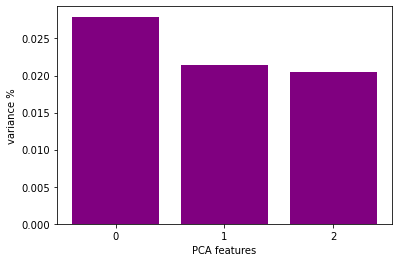

In [35]:
#Plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='purple')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [41]:
#reduce with t-SNE
tsne = TSNE(learning_rate=40)
tsne_features=tsne.fit_transform(crypto_pca)

In [42]:
tsne_features.shape

(532, 2)

Component features reduced to two

In [43]:
x = tsne_features[:,0]
y = tsne_features[:,1]

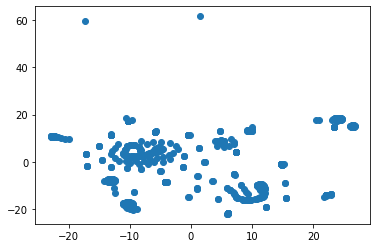

In [44]:
#plot results
plt.scatter(x,y)
plt.show()

C:\Users\ravjo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


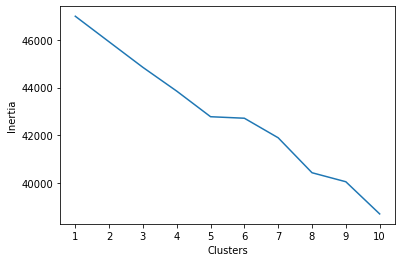

In [47]:
#cluster k-means
#use for loop to find inertia in range 1-10
inertia = []
k = list(range(1,11))

for i in k:
    kmeans=KMeans(n_clusters=i, random_state=40)
    kmeans.fit(crypto_pca)
    inertia.append(kmeans.inertia_)
    
elbow = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()


No clear elbow observed from graph. Woould have to choose clusters based on needs or use another method to narrow down clusters